# 微分方程式的級數解

## 常點 (ordinary point) 解

### 微分方程式的級數解概述

微分方程式的級數解是一種用冪級數展開解決微分方程式的方法。它的基本思想是假設解 $ y(x) $ 可以表示為以下形式的冪級數：

$$
y(x) = \sum_{n=0}^\infty a_n x^n,
$$

將此形式代入微分方程，通過匹配各項次數的係數，導出一組遞迴關係，用以計算各級數係數 $ a_n $。這種方法特別適合解具有奇點的微分方程，如 Bessel 方程式等。

---

### 範例問題

解以下微分方程式的冪級數解：

$$
(x^2+1)y'' + 2x y' = 0,
$$

並假設解的形式為冪級數展開：

$$
y(x) = \sum_{n=0}^\infty a_n x^n
$$

利用初始條件：

$$
y(0) = 0,\quad y'(0) = 1
$$

亦即

$$
a_0 = 0, \quad a_1 = 1
$$

求前 10 項展開的解。

---

### 一般解法

以下是用 SageMath 之 `desolve` 指令求解：

In [1]:
%display latex
x = var('x')
y = function('y')(x)
de1 = (x^2+1)*diff(y,x,2) + 2*x*diff(y,x) == 0
de1

2*x*diff(y(x), x) + (x^2 + 1)*diff(y(x), x, x) == 0

In [2]:
sol1 = desolve(de1, y, ics=[0,0,1])
sol1

arctan(x)

將此解用冪級數展開：

In [3]:
sol1.series(x==0, 10)

1*x + (-1/3)*x^3 + 1/5*x^5 + (-1/7)*x^7 + 1/9*x^9 + Order(x^10)

---

### 用 SageMath 解問題

以下是用 SageMath 解該問題的詳細步驟：

#### 第一步：定義變數和符號
我們需要定義變數 $x$ 和冪級數的係數 $a_n$。

In [4]:
# 定義變數和符號
x = var('x')  # 定義變數 x
n_terms = 10  # 展開的項數
a = [var(f'a_{i}') for i in range(n_terms)]  # 定義符號 a_0, a_1, ..., a_(n_terms-1)

#### 第二步：假設解為冪級數形式
將解表示為冪級數的形式：

$$
y(x) = \sum_{n=0}^{n_{\text{terms}}} a_n x^n
$$

其中 $n_{\text{terms}}$ 為展開之項數。在 SageMath 中可以寫為：

In [5]:
# 假設解為冪級數形式, a[i] 為係數串列, i = 0, ..., n_terms
y_series = sum(a[i] * x^i for i in range(n_terms))

#### 第三步：計算導數
我們需要計算一階和二階導數以代入微分方程。

In [6]:
# 計算一階和二階導數
y_prime = diff(y_series, x)
y_double_prime = diff(y_prime, x)

#### 第四步：代入微分方程
將冪級數和導數代入原方程：

$$
(x^2+1)y'' + 2x y' = 0,
$$

In [7]:
# 定義二階微分方程
ode = (x^2+1) * y_double_prime + 2*x * y_prime
ode

2*(36*a_9*x^7 + 28*a_8*x^6 + 21*a_7*x^5 + 15*a_6*x^4 + 10*a_5*x^3 + 6*a_4*x^2 + 3*a_3*x + a_2)*(x^2 + 1) + 2*(9*a_9*x^8 + 8*a_8*x^7 + 7*a_7*x^6 + 6*a_6*x^5 + 5*a_5*x^4 + 4*a_4*x^3 + 3*a_3*x^2 + 2*a_2*x + a_1)*x

#### 第五步：展開並匹配係數
展開方程並匹配每個次數的係數，形成遞迴關係。

In [8]:
# 展開微分方程並收集項
lhs = ode.expand()
lhs

90*a_9*x^9 + 72*a_8*x^8 + 56*a_7*x^7 + 72*a_9*x^7 + 42*a_6*x^6 + 56*a_8*x^6 + 30*a_5*x^5 + 42*a_7*x^5 + 20*a_4*x^4 + 30*a_6*x^4 + 12*a_3*x^3 + 20*a_5*x^3 + 6*a_2*x^2 + 12*a_4*x^2 + 2*a_1*x + 6*a_3*x + 2*a_2

In [9]:
# 匹配係數生成遞迴關係
coefficients = lhs.coefficients(x, n_terms)  # 提取各次項係數
coefficients

[2*a_2,
 2*a_1 + 6*a_3,
 6*a_2 + 12*a_4,
 12*a_3 + 20*a_5,
 20*a_4 + 30*a_6,
 30*a_5 + 42*a_7,
 42*a_6 + 56*a_8,
 56*a_7 + 72*a_9,
 72*a_8,
 90*a_9]

In [10]:
recurrence_eqs = [eq == 0 for eq in coefficients]  # 建立遞迴公式
recurrence_eqs

[2*a_2 == 0,
 2*a_1 + 6*a_3 == 0,
 6*a_2 + 12*a_4 == 0,
 12*a_3 + 20*a_5 == 0,
 20*a_4 + 30*a_6 == 0,
 30*a_5 + 42*a_7 == 0,
 42*a_6 + 56*a_8 == 0,
 56*a_7 + 72*a_9 == 0,
 72*a_8 == 0,
 90*a_9 == 0]

In [11]:
# 顯示遞迴公式
print("生成的遞迴關係：")
for eq in recurrence_eqs:
    show(eq)

生成的遞迴關係：


2*a_2 == 0

2*a_1 + 6*a_3 == 0

6*a_2 + 12*a_4 == 0

12*a_3 + 20*a_5 == 0

20*a_4 + 30*a_6 == 0

30*a_5 + 42*a_7 == 0

42*a_6 + 56*a_8 == 0

56*a_7 + 72*a_9 == 0

72*a_8 == 0

90*a_9 == 0

#### 第六步：設定初始條件並遞迴計算
設定初始條件 $a_0 = 0, a_1 = 1$：

In [12]:
# 初始條件 (設定 a_0 和 a_1 的值)
initial_conditions = {a[0]: 0, a[1]: 1}  # 修改此處根據需要設定初始條件
coeff_values = initial_conditions.copy()

計算後續係數 ：

In [13]:
# 遞迴計算具體數值
for i in range(2, n_terms):
    # 解遞迴公式
    solution = solve(recurrence_eqs[i-2], a[i])
    if solution:
        # 如果 `solve` 返回的是等式列表，提取右側的值
        if isinstance(solution, list):
            coeff_values[a[i]] = solution[0].rhs().subs(coeff_values).simplify()
        else:
            coeff_values[a[i]] = solution.rhs().subs(coeff_values).simplify()
    else:
        coeff_values[a[i]] = 0

#### 第七步：輸出結果
輸出所有計算得到的係數值：

In [14]:
# 顯示解出的係數數值
print("解出的係數值：")
for i in range(n_terms):
    # 確保數值計算
    numeric_value = coeff_values[a[i]].n()
    print(f"a_{i} = {numeric_value}")

解出的係數值：
a_0 = 0.000000000000000
a_1 = 1.00000000000000
a_2 = 0.000000000000000
a_3 = -0.333333333333333
a_4 = 0.000000000000000
a_5 = 0.200000000000000
a_6 = 0.000000000000000
a_7 = -0.142857142857143
a_8 = 0.000000000000000
a_9 = 0.111111111111111


以求出之係數顯示級數解：

In [15]:
f_approx = sum(coeff_values[a[i]] * x^i for i in range(n_terms))
f_approx

1/9*x^9 - 1/7*x^7 + 1/5*x^5 - 1/3*x^3 + x

與前述正解比較：

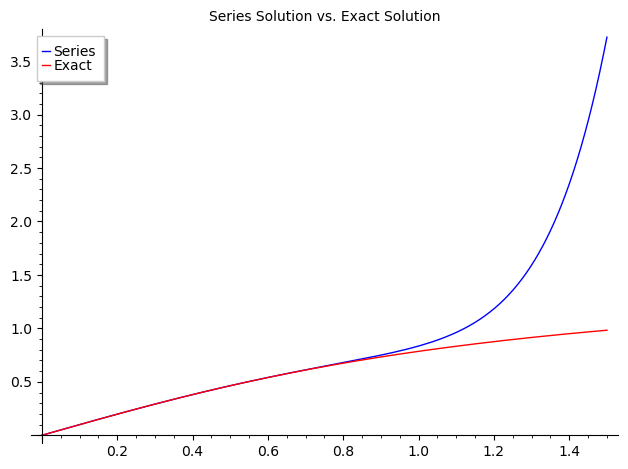

In [16]:
p1 = plot(f_approx, (x, 0, 1.5), title="Series Solution vs. Exact Solution", legend_label="Series", color="blue")
p2 = plot(arctan(x), (x, 0, 1.5), legend_label="Exact", color="red")
show(p1+p2)

### 後續討論

1. 展開階數與精確度關係？
2. 如何分析誤差？